## **Import Needed Libraries**

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-o

## **EDA**

In [2]:
df = pd.read_csv('/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv')
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

In [3]:
df.shape

(4238, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.describe()

male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.076587      0.462763     0.158316    44.590334   
min       0.000000         0.000000      0.000000     0.000000   107.000000   
25%       0.000000         0.000000      0.000000     0.000000   206.000000   
50%       0.000000         0.000000      0.000000     0.000000   234.000000   
75%       0.000000         0.000000      1.000000     0.000000   263.000000   
max       1.000000         1.000000      1.000000     1.000000   696.000000   

             sysBP        diaBP          BMI    heartRate      glucose  \
count  4238.000000  4238.000000  4219.000000  4237.000000  3850.000000   
mean    132.352407    82.893464    25.802008    75.878924    81.966753   
std      22.038097    11.910850     4.080111    12.026596    23.959998   
min      83.500000    48.000000    15.540000    44.000000    40.000000   
25%     117.000000    75.000000    23.070000    68.000000    71.000000   
50%     128.000000    82.000000    25.400000    75.000000    78.000000   
75%     144.000000    89.875000    28.040000    83.000000    87.000000   
max     295.000000   142.500000    56.800000   143.000000   394.000000   

        TenYearCHD  
count  4238.000000  
mean      0.151958  
std       0.359023  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

### **Calculating Missing Data**

In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### **Report For Exploring The Data**

In [7]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

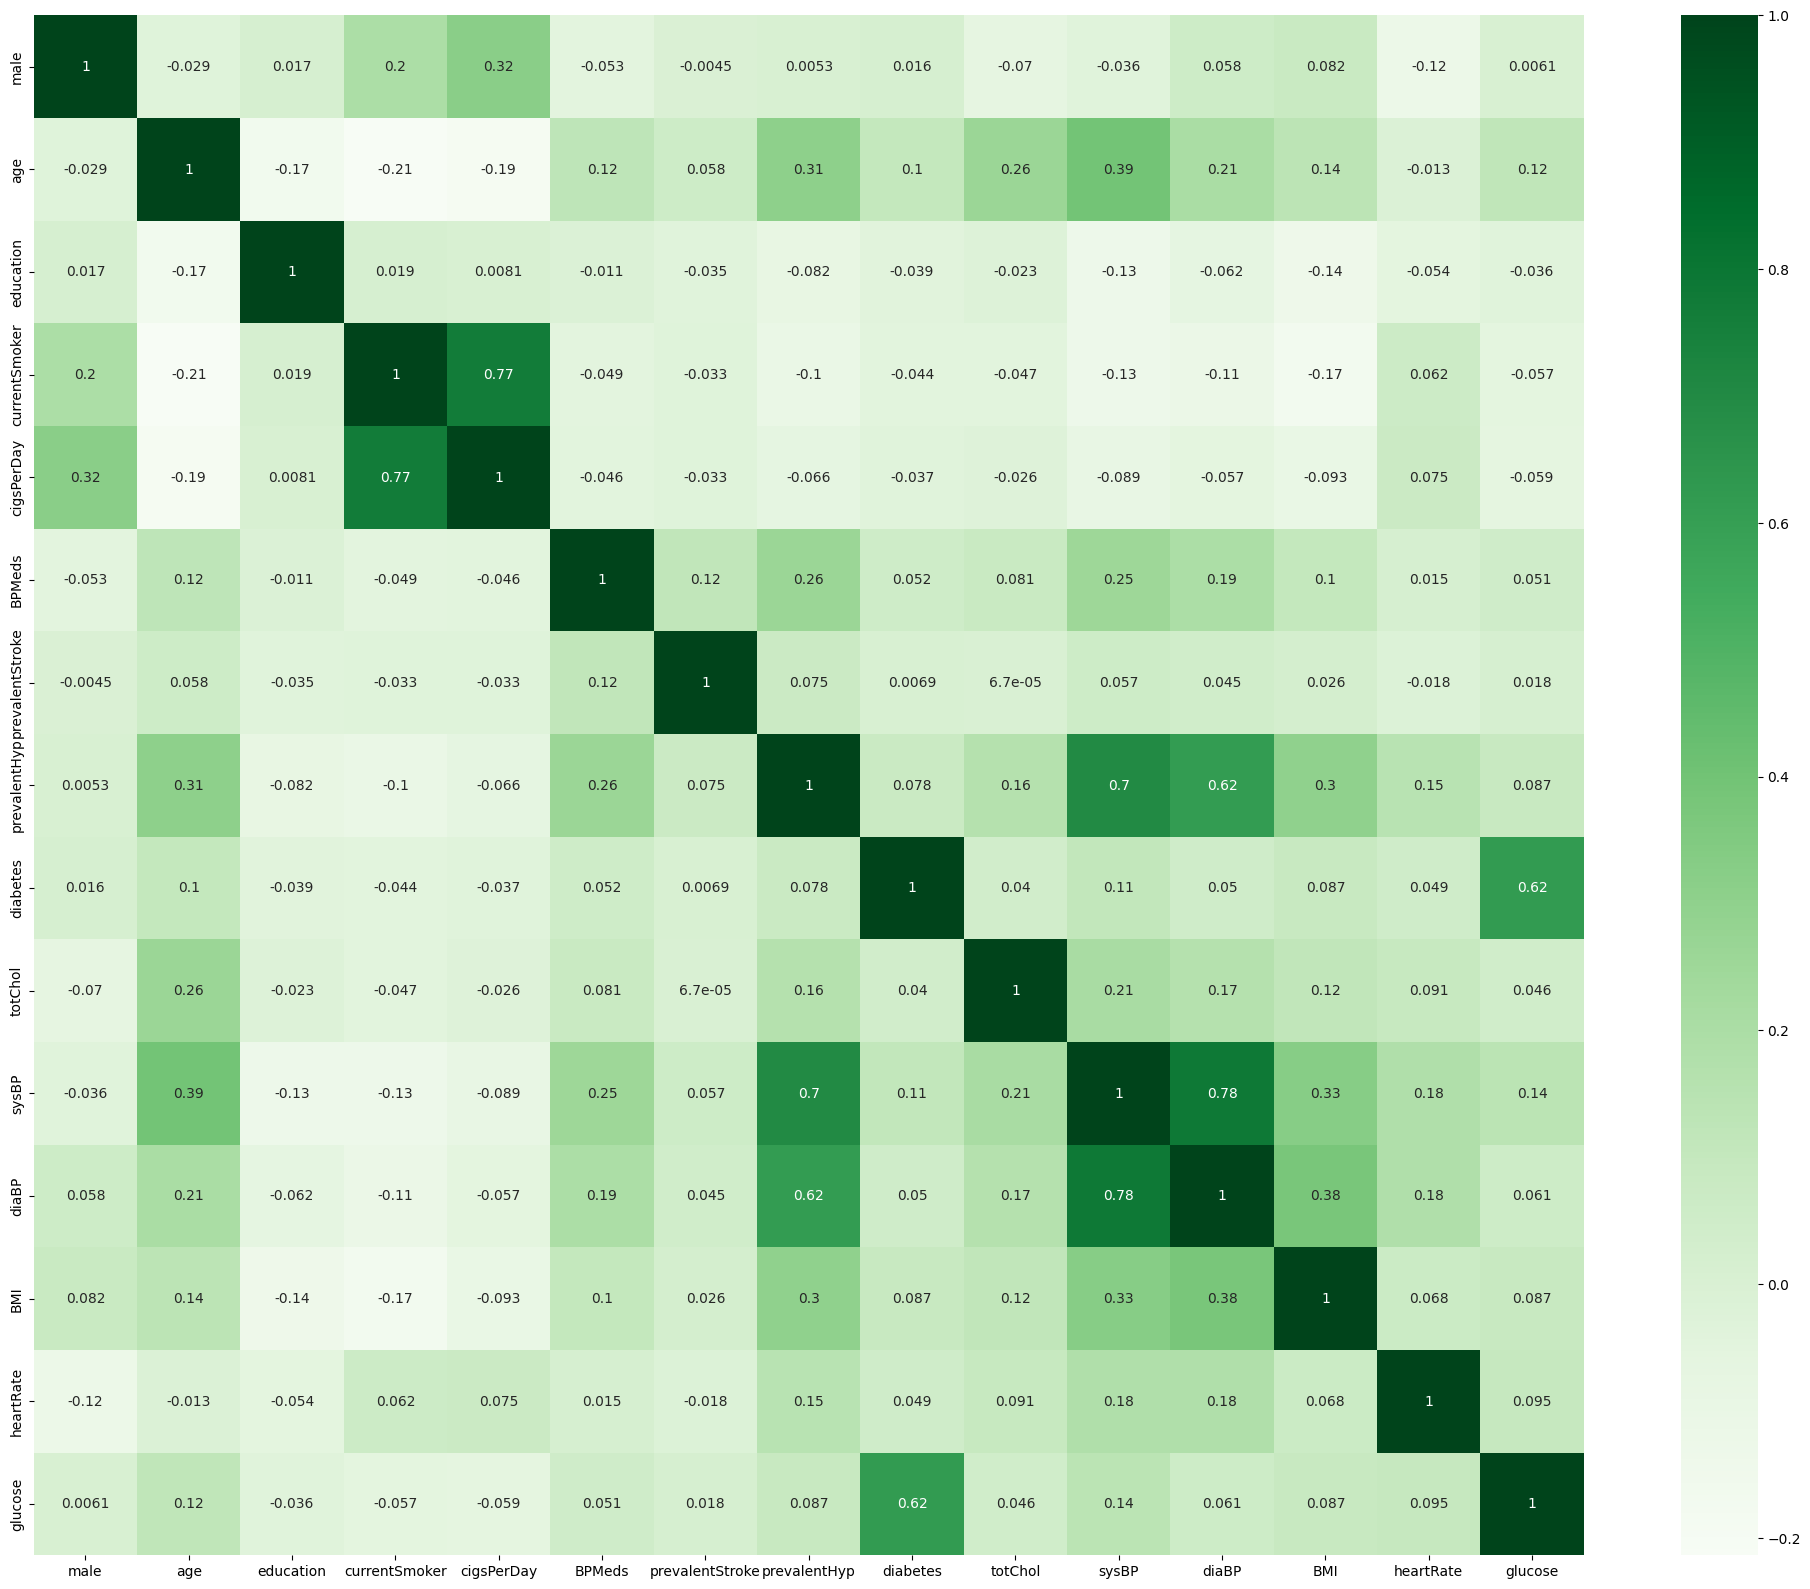

In [8]:
corr = df.drop(columns= 'TenYearCHD').corr()
fig , ax = plt.subplots(figsize=(25 , 20))
sns.heatmap(corr ,annot= True , ax=ax , cmap= 'Greens');

## **Preprocessing**

### **Define Features (X) And Target (y)**

In [9]:
X = df.drop('TenYearCHD' , axis= 'columns')
y = df['TenYearCHD']

### **Data Splitting**

In [10]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , shuffle=True , random_state=42)

### **Data Scaling**

In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

### **Baseline**

In [12]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train , y_train)
y_pred = dummy_classifier.predict(X_test)
accuracy = accuracy_score(y_test , y_pred)
print(f"Baseline Model Accuracy: {accuracy:.4f}")

Baseline Model Accuracy: 0.8538


## **Machine Learning Models**

### **1. Logistic Regression Model**

In [13]:
lr_model = make_pipeline(SimpleImputer(strategy='mean') , MinMaxScaler() , LogisticRegression(penalty='l2' , C= 12 ,max_iter=1500))
lr_model.fit(X_train , y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('logisticregression',
                 LogisticRegression(C=12, max_iter=1500))])

In [14]:
lr_model.score(X_train , y_train)

0.8551622418879056

In [15]:
lr_pred = lr_model.predict(X_test)

In [16]:
lr_acc_score = accuracy_score(y_test , lr_pred)
lr_acc_score

0.8573113207547169

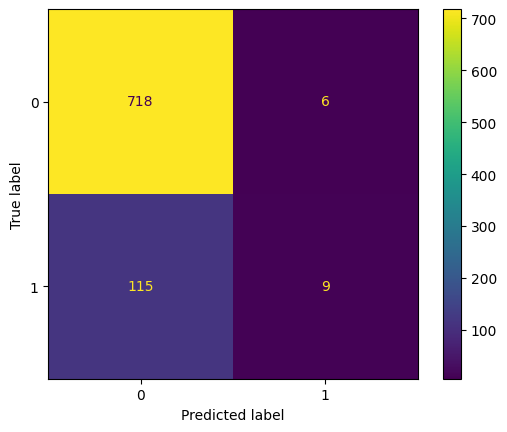

In [17]:
ConfusionMatrixDisplay.from_estimator(lr_model , X_test , y_test);

In [18]:
print(classification_report(y_test , lr_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



### **2. Decission Tree Model**

In [19]:
dt_model = make_pipeline(SimpleImputer(strategy='mean') , MinMaxScaler() , DecisionTreeClassifier())
dt_model.fit(X_train , y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [20]:
dt_model.score(X_train , y_train)

1.0

In [21]:
dt_pred = dt_model.predict(X_test)

In [22]:
dt_acc_score = accuracy_score(y_test , dt_pred)
dt_acc_score

0.7594339622641509

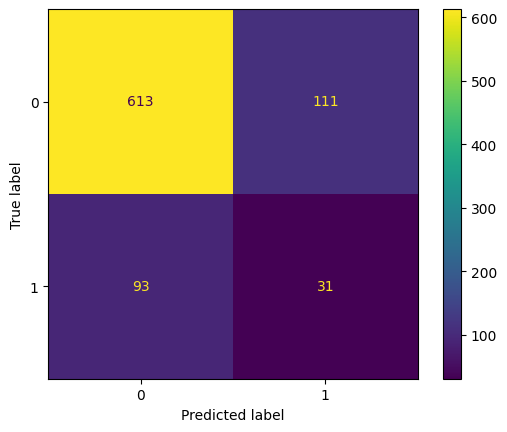

In [23]:
ConfusionMatrixDisplay.from_estimator(dt_model , X_test , y_test);

In [24]:
print(classification_report(y_test , dt_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       724
           1       0.22      0.25      0.23       124

    accuracy                           0.76       848
   macro avg       0.54      0.55      0.55       848
weighted avg       0.77      0.76      0.77       848



#### **Overfitting Happened In This Model**

### **3. Random Forest Model**

In [25]:
rf_model = make_pipeline(SimpleImputer(strategy='mean') , MinMaxScaler() , RandomForestClassifier(n_estimators=500))
rf_model.fit(X_train , y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(n_estimators=500))])

In [26]:
rf_model.score(X_train , y_train)

1.0

In [27]:
rf_pred = rf_model.predict(X_test)

In [28]:
rf_acc_score = accuracy_score(y_test , rf_pred)
rf_acc_score

0.8549528301886793

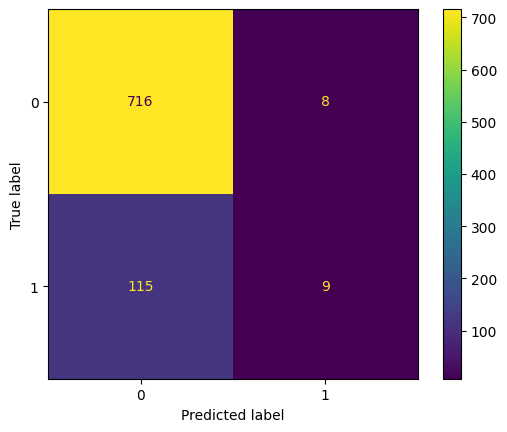

In [29]:
ConfusionMatrixDisplay.from_estimator(rf_model , X_test , y_test);

In [30]:
print(classification_report(y_test , rf_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.53      0.07      0.13       124

    accuracy                           0.85       848
   macro avg       0.70      0.53      0.52       848
weighted avg       0.81      0.85      0.80       848



#### **Overfitting Happend In This Model**

### **4. Support Vector Machine**

In [31]:
svc = make_pipeline(SimpleImputer(strategy='mean') , MinMaxScaler() , SVC())
svc.fit(X_train , y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('minmaxscaler', MinMaxScaler()), ('svc', SVC())])

In [32]:
svc.score(X_train , y_train)

0.8504424778761062

In [33]:
svc_pred = svc.predict(X_test)

In [34]:
svc_acc_score = accuracy_score(y_test , svc_pred)
svc_acc_score

0.8549528301886793

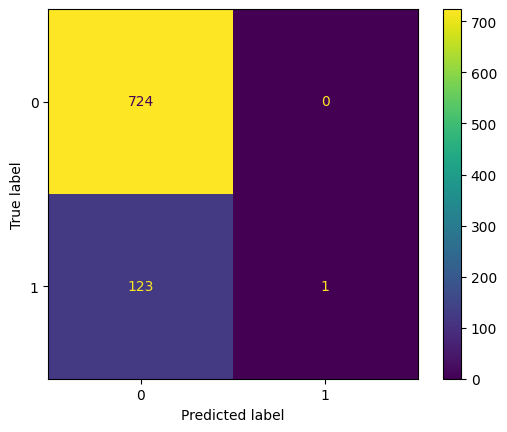

In [35]:
ConfusionMatrixDisplay.from_estimator(svc , X_test , y_test);

In [36]:
print(classification_report(y_test , svc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       724
           1       1.00      0.01      0.02       124

    accuracy                           0.85       848
   macro avg       0.93      0.50      0.47       848
weighted avg       0.88      0.85      0.79       848



## **Models Evaluation**

In [37]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Decision Tree','Random Forest','Support Vector Machine'], 'Accuracy': [lr_acc_score*100,
                    dt_acc_score*100,rf_acc_score*100,svc_acc_score*100]})
model_ev

Model   Accuracy
0     Logistic Regression  85.731132
1           Decision Tree  75.943396
2           Random Forest  85.495283
3  Support Vector Machine  85.495283

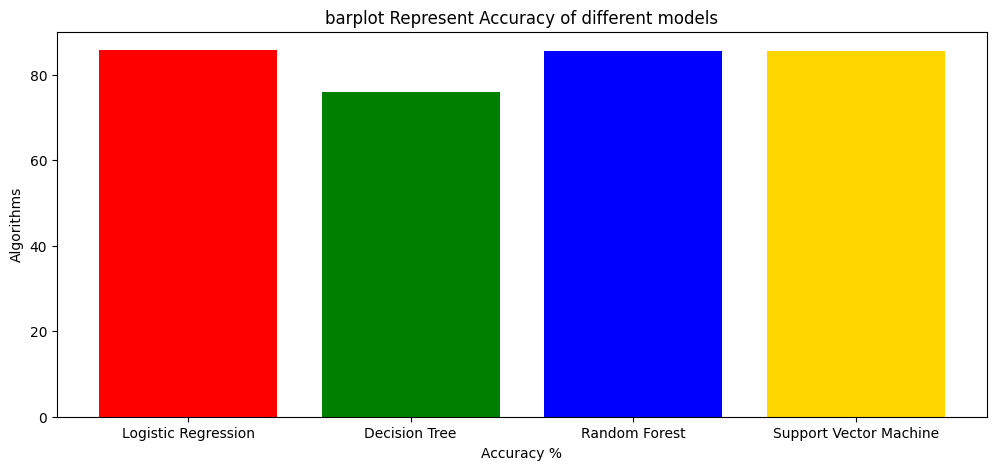

In [38]:
colors = ['red','green','blue','gold']
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Accuracy'],color = colors)
plt.show()

## **Conclusion**

#### **The Logistic Regression Model Gives The Best Accuracy And After It The Support Vector Machine**
#### **Both Decision Tree Model And Random Forest Model Goes to Overfitting**